In [4]:
# Environment Setup
# ----------------------------------------------------------------
# Dependencies
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string



In [10]:

# Output File Names
file_output_city_csv = "generated_data/city_data.csv"
file_output_rides_csv = "generated_data/ride_data.csv"

city_data = pd.read_csv(file_output_city_csv)
ride_data = pd.read_csv(file_output_rides_csv)
city_data.head() 
ride_data.head()




,city,date,fare,ride_id
0,New Clayton,2018-04-05 19:11:35,25.95,160732948145
1,Walkerbury,2018-01-26 06:14:44,10.71,433370563392
2,Guyberg,2018-01-27 08:27:22,10.65,405118851719
3,Stevenport,2018-05-10 06:51:02,8.62,6839339077391
4,New Robert,2018-04-06 04:47:56,32.00,307383869119


In [11]:
city_ride_data = pd.merge(ride_data, city_data, how="left", on=["city", "city"])
city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,New Clayton,2018-04-05 19:11:35,25.95,160732948145,18,Urban
1,Walkerbury,2018-01-26 06:14:44,10.71,433370563392,34,Urban
2,Guyberg,2018-01-27 08:27:22,10.65,405118851719,24,Urban
3,Stevenport,2018-05-10 06:51:02,8.62,6839339077391,3,Urban
4,New Robert,2018-04-06 04:47:56,32.00,307383869119,42,Urban


In [3]:
# Generator Conditions (Change as needed)
# ----------------------------------------------------------------
rough_ride_count = 2500
rough_driver_count = 950
city_count = 120
city_types = [
    {
        "type": "Urban",
        "fare_range": (4, 45),
        "percent_of_rides": 0.65,
        "percent_of_drivers": 0.65,
        "percentage_of_cities": 0.55
    },
    {
        "type": "Suburban",
        "fare_range": (12, 50),
        "percent_of_rides": 0.25,
        "percent_of_drivers": 0.25,
        "percentage_of_cities": 0.35
    },
    {
        "type": "Rural",
        "fare_range": (10, 60),
        "percent_of_rides": 0.05,
        "percent_of_drivers": 0.10,
        "percentage_of_cities": 0.15
    }
]

In [4]:
# Create a CSV of city data 
# City | Driver_Count | Type

# List will hold the final set of city data 
cities_data = []

# Calculate the driver count for each city type
for city_type in city_types:
    city_type["total_drivers"] = int(city_type["percent_of_drivers"] * rough_driver_count)
    city_type["city_count"] = int(city_type["percentage_of_cities"] * city_count)
    
    # Use the driver count to create a set number of fake cities each given a random number of drivers
    for city in range(city_type["city_count"]):
        cities_data.append({"city": fake.city(), 
                       "type": city_type["type"], 
                       "driver_count": np.random.randint(1, city_type["total_drivers"] * 0.12)})




In [5]:
# Convert the city data into a DataFrame    
cities_pd = pd.DataFrame(cities_data)

# Export the city data to a csv 
cities_pd.to_csv(file_output_city_csv, index=False)

cities_pd.head()

,city,driver_count,type
0,Edwintown,26,Urban
1,New David,1,Urban
2,Port Coryport,66,Urban
3,Walshmouth,32,Urban
4,New Julie,57,Urban


In [6]:
# Create a CSV of ride data
# Ride ID | City | Date | Fare | 

# List will hold all the final set of rides
rides = []

# Loop through all city types
for city_type in city_types:
    
    # Determine the total rides for each city type
    city_type["total_rides"] = int(city_type["percent_of_rides"] * rough_ride_count)
    
    # Choose a city from that city type at random to distribute the rides across cities
    for ride in range(city_type["total_rides"]):
        
        # Create a list of dictionaries for each ride
        rides.append({"ride_id": fake.ean13(), 
                      "date": fake.date_time_this_year(), 
                      "city": np.random.choice(cities_pd[cities_pd["type"] == city_type["type"]]["city"]), 
                      "fare": round(np.random.uniform(city_type["fare_range"][0], city_type["fare_range"][1]), 2)})


In [7]:

# Convert the ride list into a data frame
rides_pd = pd.DataFrame(rides)

# Export the ride data to a csv
rides_pd.to_csv(file_output_rides_csv, index=False)

rides_pd.head()

,city,date,fare,ride_id
0,New Clayton,2018-04-05 19:11:35,25.95,0160732948145
1,Walkerbury,2018-01-26 06:14:44,10.71,0433370563392
2,Guyberg,2018-01-27 08:27:22,10.65,0405118851719
3,Stevenport,2018-05-10 06:51:02,8.62,6839339077391
4,New Robert,2018-04-06 04:47:56,32.00,0307383869119


In [8]:
rides_pd.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
urban_cities = city_ride_data[city_ride_data["type"] == "Urban"]
suburban_cities = city_ride_data[city_ride_data["type"] == "Suburban"]
rural_cities = city_ride_data[city_ride_data["type"] == "Rural"]

urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]

suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]

rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]

#individual scatter plots for different cities 

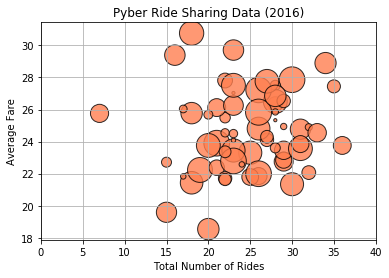

In [19]:
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Urban")
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare")
plt.xlabel("Total Number of Rides")
plt.xlim((0,40))
plt.grid(True)

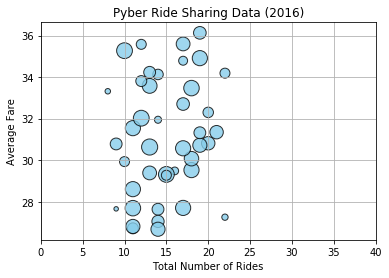

In [20]:
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Suburban")
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare")
plt.xlabel("Total Number of Rides")
plt.xlim((0,40))
plt.grid(True)

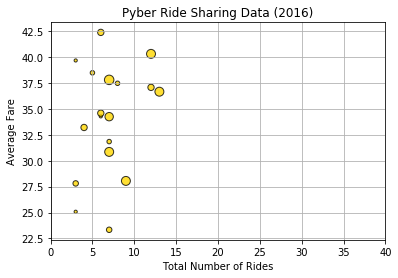

In [21]:
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Rural")
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare")
plt.xlabel("Total Number of Rides")
plt.xlim((0,40))
plt.grid(True)

#Cumilative scatter plot

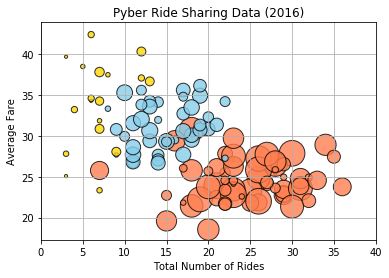

In [22]:
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Rural")
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare")
plt.xlabel("Total Number of Rides")
plt.xlim((0,40))
plt.grid(True)

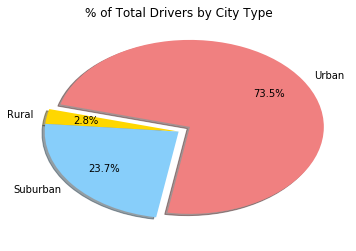

In [25]:
driver_percents = 100 * city_data.groupby(["type"]).sum()["driver_count"] / city_data["driver_count"].sum()

plt.pie(driver_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', pctdistance=0.70,
        shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")


# Show Figure
plt.show()